In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

import matplotlib
from matplotlib.ticker import MultipleLocator

In [2]:
print('NumPy version: {}'.format(np.__version__))
print('pandas version: {}'.format(pd.__version__))
print('matplotlib version: {}'.format(matplotlib.__version__))

NumPy version: 1.19.2
pandas version: 1.1.3
matplotlib version: 3.3.2


In [3]:
%matplotlib notebook

In [4]:
# SN metadata

z = 0.0307
t_max = 2458986.91
t_max_mjd = t_max - 2400000.5

In [5]:
def plot_box_spec(wave, flux): 
    flux_plot = np.repeat(flux, 2)
    wv_plot = wave.copy()
    wv_plot[:-1] += np.diff(wave)/2
    wv_plot = np.append(wave[0]-(wave[1]-wave[0])/2, 
                        np.append(np.repeat(wv_plot[0:-1], 2), 
                                  wave[-1]+(wave[-1]-wave[-2])/2))
    
    return wv_plot, flux_plot

In [6]:
minus10 = '../data/spectroscopy/ZTF20aayhacx_20200507_P60_v2.ascii'
minus10_df = pd.read_csv(minus10, comment='#', delim_whitespace=True, header=None)
minus4 = '../data/spectroscopy/ZTF20aayhacx_20200513_NOT_v3.ascii'
minus4_df = pd.read_csv(minus4, 
                        comment='#', delim_whitespace=True, header=None)
plus11 = '../data/spectroscopy/ZTF20aayhacx_20200529_Lick_3-m_v1.ascii'
plus11_df = pd.read_csv(plus11, 
                        comment='#', delim_whitespace=True, header=None)

In [7]:
# grab data for 2018byg
sn2018byg_minus10 = '../data/comp_sne/2018byg_2018-05-08_P200_DBSP_None.ascii'
sn2018byg_minus10_df = pd.read_csv(sn2018byg_minus10, 
                                   comment='#', delim_whitespace=True, header=None)
sn2018byg_minus5 = '../data/comp_sne/2018byg_2018-05-14_Keck1_LRIS_None.ascii'
sn2018byg_minus5_df = pd.read_csv(sn2018byg_minus5, 
                                   comment='#', delim_whitespace=True, header=None)
sn2018byg_minus2 = '../data/comp_sne/2018byg_2018-05-17_P200_DBSP_None.ascii'
sn2018byg_minus2_df = pd.read_csv(sn2018byg_minus2, 
                                   comment='#', delim_whitespace=True, header=None)

sn2018byg_plus11 = '../data/comp_sne/2018byg_2018-05-31_DCT_Deveny-LMI_None.ascii'
sn2018byg_plus11_df = pd.read_csv(sn2018byg_plus11, 
                                   comment='#', delim_whitespace=True, header=None)

z_18byg = 0.066

<IPython.core.display.Javascript object>


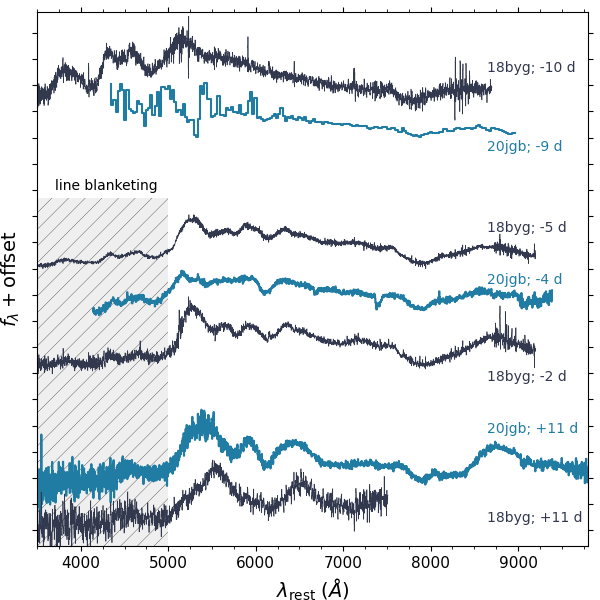

In [8]:
proposal = True

aam_colors = {'mustard': "#E29930",
             'blue': "#217CA3",
             'asphalt': "#32384D",
             'navy': "#444C5C",
             'punch': "#CE5A57",
             'ocean': "#78A5A3",
             'warm': "#E1B16A",}


fig, ax = plt.subplots(1, 1, figsize = (6,6))

# 18byg -10 spectrum
wv, fl = plot_box_spec(sn2018byg_minus10_df[0].values, sn2018byg_minus10_df[1].values)
show_blue = np.where(wv/(1+z_18byg) < 8700)
norm_flux = np.median(fl[np.where((wv > 7200) & (wv < 7400))])
ax.plot(wv[show_blue]/(1+z_18byg), fl[show_blue]/norm_flux + 1, 
        color=aam_colors['asphalt'], lw=0.5)

# 20jgb -10 spectrum
wv, fl = plot_box_spec(minus10_df[0].values, minus10_df[1].values)
show_red = np.where(wv/(1+z_18byg) > 4200)
norm_flux = np.median(fl[np.where((wv > 7200) & (wv < 7400))])
ax.plot(wv[show_red]/(1+z), fl[show_red]/norm_flux - 0.5, color=aam_colors['blue'])

# 18byg -5 spectrum
wv, fl = plot_box_spec(sn2018byg_minus5_df[0].values, sn2018byg_minus5_df[1].values)
show = np.where((wv/(1+z_18byg) > 3400) & (wv/(1+z_18byg) < 9200))
norm_flux = np.median(fl[np.where((wv > 7200) & (wv < 7400))])
ax.plot(wv[show]/(1+z_18byg), fl[show]/norm_flux - 5, 
        color=aam_colors['asphalt'], lw=0.5)

# 20jgb -4 spectrum
wv, fl = plot_box_spec(minus4_df[0].values, minus4_df[1].values)
show_red = np.where(wv/(1+z_18byg) > 4000)
norm_flux = np.median(fl[np.where((wv > 7200) & (wv < 7400))])
ax.plot(wv[show_red]/(1+z), fl[show_red]/norm_flux - 6.9, color=aam_colors['blue'])


# 18byg -2 spectrum
wv, fl = plot_box_spec(sn2018byg_minus2_df[0].values, sn2018byg_minus2_df[1].values)
show = np.where((wv/(1+z_18byg) > 3400) & (wv/(1+z_18byg) < 9200))
norm_flux = np.median(fl[np.where((wv > 7200) & (wv < 7400))])
ax.plot(wv[show]/(1+z_18byg), fl[show]/norm_flux - 8.8, 
        color=aam_colors['asphalt'], lw=0.5)



# 20jgb +11 spectrum
wv, fl = plot_box_spec(plus11_df[0].values, plus11_df[1].values)
show_red = np.where(wv/(1+z_18byg) > 1000)
norm_flux = np.median(fl[np.where((wv > 7200) & (wv < 7400))])
ax.plot(wv[show_red]/(1+z), fl[show_red]/norm_flux - 13.5, color=aam_colors['blue'])


# 18byg +11 spectrum
wv, fl = plot_box_spec(sn2018byg_plus11_df[0].values, sn2018byg_plus11_df[1].values)
show = np.where((wv/(1+z_18byg) > 1400) & (wv/(1+z_18byg) < 20000))
norm_flux = np.median(fl[np.where((wv > 7200) & (wv < 7400))])
ax.plot(wv[show]/(1+z_18byg), fl[show]/norm_flux - 15, 
        color=aam_colors['asphalt'], lw=0.5)



ax.text(8650, 2.5, '18byg; -10 d', color=aam_colors['asphalt'])
ax.text(8650, -0.5, '20jgb; -9 d', color=aam_colors['blue'])
ax.text(8650, -3.6, '18byg; -5 d', color=aam_colors['asphalt'])
ax.text(8650, -5.6, '20jgb; -4 d', color=aam_colors['blue'])
ax.text(8650, -9.3, '18byg; -2 d', color=aam_colors['asphalt'])
ax.text(8650, -11.3, '20jgb; +11 d', color=aam_colors['blue'])
ax.text(8650, -14.7, '18byg; +11 d', color=aam_colors['asphalt'])

ax.set_xlim(3500,9800)
ax.set_ylim(-15.6,4.8)
ax.set_yticklabels([])
ax.set_ylabel(r'$f_\lambda + \mathrm{offset}$', fontsize=14)
ax.set_xlabel(r'$\lambda_\mathrm{rest} \;  (\AA)$', fontsize=14)
ax.xaxis.set_minor_locator(MultipleLocator(250))
ax.yaxis.set_major_locator(MultipleLocator(1))

ax.tick_params(which='both', top=True, right=True, labelsize=11)


if proposal:
    from matplotlib.patches import Rectangle 
    plt.rcParams['hatch.linewidth'] = 0.2
    ax.add_patch( Rectangle((3000, -16), 
                        2000, 13.7, fc='0.8', hatch='//', lw=0.2, alpha=0.3) ) 
    ax.text(3700, -2, 'line blanketing', color='k')


fig.subplots_adjust(left=0.062, bottom=0.09,right=0.98, top=0.98)
fig.savefig('../paper/figures/sn18byg_comp.pdf')